In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r"D:\Phishing_detection\Dataset\url_dataset_with_features.csv")
df.head()

,url,type,url_length,num_slashes,num_dots,num_question_marks,num_dashes,num_at,has_query,path_to_length_ratio,...,http_in_middle,has_ip,has_unicode,has_port,special_keyword_count,num_subdomain,digit_ratio_in_domain,has_risk,url_entropy,domain_lenght
0,https://www.google.com,legitimate,22,2,2,0,0,0,False,0.0,...,False,False,False,False,1,1,0.0,com,3.663533,6
1,https://www.youtube.com,legitimate,23,2,2,0,0,0,False,0.0,...,False,False,False,False,1,1,0.0,com,3.762267,7
2,https://www.facebook.com,legitimate,24,2,2,0,0,0,False,0.0,...,False,False,False,False,1,1,0.0,com,3.855389,8
3,https://www.baidu.com,legitimate,21,2,2,0,0,0,False,0.0,...,False,False,False,False,1,1,0.0,com,3.880180,5
4,https://www.wikipedia.org,legitimate,25,2,2,0,0,0,False,0.0,...,False,False,False,False,1,1,0.0,org,3.813661,9


In [30]:
bool_cols = ["symbol_at_end", "http_in_middle", "has_ip", "has_port"]

df[bool_cols] = df[bool_cols].astype(int)
df["type"] = df["type"].map({"legitimate": 0, "phishing": 1})

In [31]:
df

,url,type,url_length,num_slashes,num_dots,num_question_marks,num_dashes,num_at,has_query,path_to_length_ratio,...,http_in_middle,has_ip,has_unicode,has_port,special_keyword_count,num_subdomain,digit_ratio_in_domain,has_risk,url_entropy,domain_lenght
0,https://www.google.com,0,22,2,2,0,0,0,False,0.000000,...,0,0,False,0,1,1,0.0,com,3.663533,6
1,https://www.youtube.com,0,23,2,2,0,0,0,False,0.000000,...,0,0,False,0,1,1,0.0,com,3.762267,7
2,https://www.facebook.com,0,24,2,2,0,0,0,False,0.000000,...,0,0,False,0,1,1,0.0,com,3.855389,8
3,https://www.baidu.com,0,21,2,2,0,0,0,False,0.000000,...,0,0,False,0,1,1,0.0,com,3.880180,5
4,https://www.wikipedia.org,0,25,2,2,0,0,0,False,0.000000,...,0,0,False,0,1,1,0.0,org,3.813661,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,1,43,5,2,0,1,0,False,0.581395,...,0,0,False,0,2,0,0.0,com,3.874426,7
450172,http://faboleena.com/js/infortis/jquery/plugin...,1,159,14,2,0,0,0,False,0.874214,...,0,0,False,0,3,0,0.0,com,4.895229,9
450173,http://faboleena.com/js/infortis/jquery/plugin...,1,147,14,1,0,0,0,False,0.863946,...,0,0,False,0,3,0,0.0,com,4.831358,9
450174,http://atualizapj.com/,1,22,3,1,0,0,0,False,0.045455,...,0,0,False,0,1,0,0.0,com,3.720129,10


In [33]:
x = df.drop(columns=["url","type","has_risk"])
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape,y_train.shape)
x.shape,y.shape


(360140, 20) (360140,)


((450176, 20), (450176,))

In [34]:
rf = RandomForestClassifier(
    n_estimators=1200,          
    max_depth=30,       
    min_samples_split=10,       
    min_samples_leaf=1,        
    max_features="sqrt",       
    class_weight="balanced",   
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    criterion="entropy"
)

In [35]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",30
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `met

In [36]:
y_pred = rf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     69148
           1       0.94      0.92      0.93     20888

    accuracy                           0.97     90036
   macro avg       0.96      0.95      0.95     90036
weighted avg       0.97      0.97      0.97     90036

Confusion Matrix: [[67976  1172]
 [ 1761 19127]]
Accuracy: 0.9674241414545293


In [38]:

print(rf.feature_names_in_)
namess=[]
importances=[]
for name, importance in zip(x.columns, rf.feature_importances_):
    print(name, importance)
    namess.append(name)
    importances.append(importance)
    


['url_length' 'num_slashes' 'num_dots' 'num_question_marks' 'num_dashes'
 'num_at' 'has_query' 'path_to_length_ratio' 'special_char_ratio'
 'suspicious_char_count' 'symbol_at_end' 'http_in_middle' 'has_ip'
 'has_unicode' 'has_port' 'special_keyword_count' 'num_subdomain'
 'digit_ratio_in_domain' 'url_entropy' 'domain_lenght']
url_length 0.05183076010943862
num_slashes 0.03103341047096889
num_dots 0.09931321296581205
num_question_marks 0.005601313932368797
num_dashes 0.03481184474408821
num_at 0.003150023894370225
has_query 0.005011403382436761
path_to_length_ratio 0.07889589837540077
special_char_ratio 0.05932855108296545
suspicious_char_count 0.03873233102036775
symbol_at_end 0.00585403809106588
http_in_middle 0.0024298000627672282
has_ip 0.01307790015300648
has_unicode 7.052161552545771e-05
has_port 0.004111060561137822
special_keyword_count 0.10976951846572575
num_subdomain 0.2708323546171227
digit_ratio_in_domain 0.05277406574486614
url_entropy 0.06429540693814384
domain_lenght 0.0

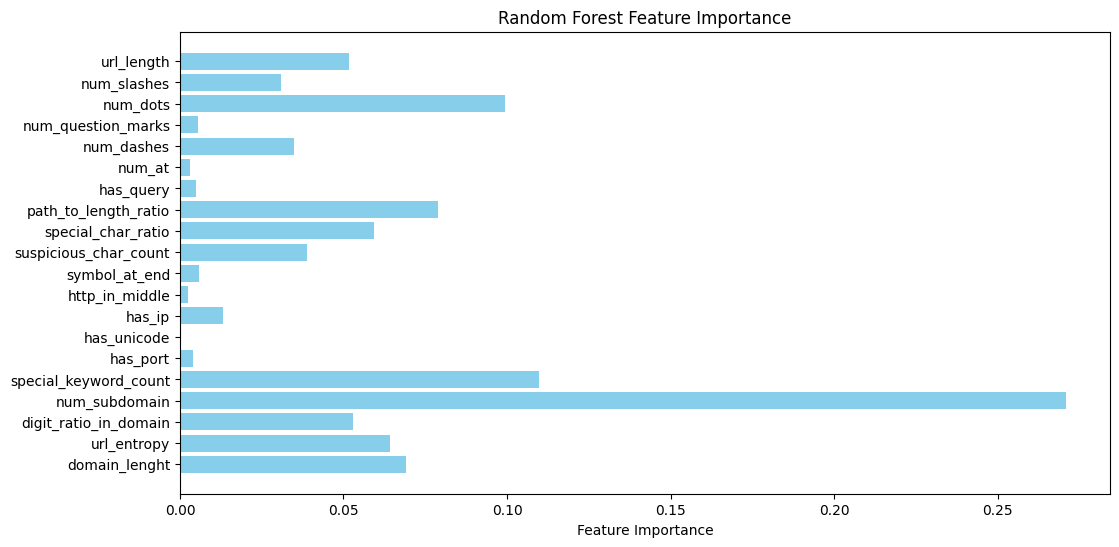

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(namess, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  
plt.show()


In [40]:
probs = rf.predict_proba(X_test)[:, 1]


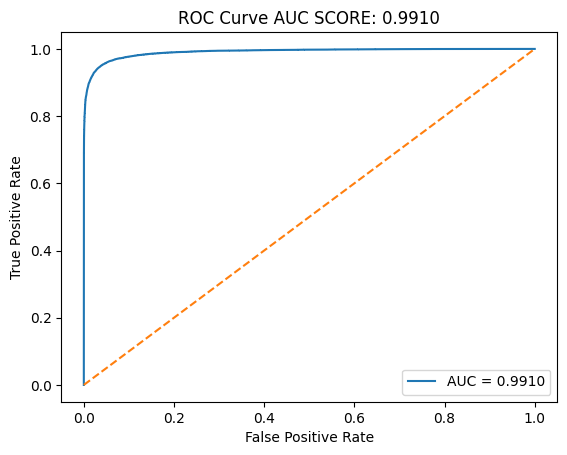

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,thresholds=roc_curve(y_test,probs)
auc_score= roc_auc_score(y_test,probs)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve AUC SCORE: {auc_score:.4f}")
plt.legend()
plt.show()

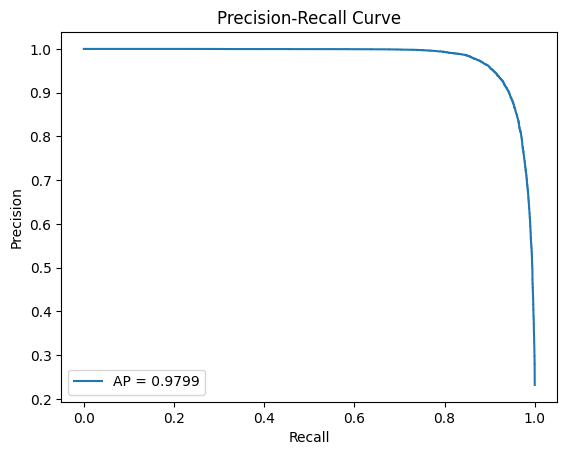

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, probs)
ap_score = average_precision_score(y_test, probs)

plt.figure()
plt.plot(recall, precision, label=f"AP = {ap_score:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
from joblib import dump

dump(rf,"Phishing_Classifier")